<a href="https://colab.research.google.com/github/Ignacio-Ibarra/NLP-Disasters/blob/master/VERSION%20FINAL/TP%202/Modelos/Arboles/XGBoost_only_numeric_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a XGBoost only with numeric features**

# Libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_1_nacho/intento_1/train_no_duplicates_with_word_classes.csv',\
                         sep=',', usecols = ['url_count',
       'hashtag_count', 'mention_count', 'digits_count', 'characters_count',
       'characters_count_clean', 'characters_count_clean_sw', 'word_count',
       'word_count_clean', 'word_count_clean_sw', 'avg_word_len',
       'avg_word_len_clean_sw', 'PRP$', 'NNS', 'VBP', 'DT', 'NN', 'IN', 'MD',
       'VB', 'JJ', 'PRP', 'JJS', 'VBD', 'TO', 'VBG', 'VBN', 'CC', 'CD', 'RB',
       'EX', 'VBZ', 'WP', 'RP', 'JJR', 'WRB', '$', 'WDT', 'NNP', 'RBR', 'RBS',
       'PDT', 'SYM', 'FW', 'UH', 'X', 'WP$', 'target'],\
       dtype = {'PRP$': 'int64', 'NNS': 'int64', 'VBP': 'int64', 'DT': 'int64', 'NN': 'int64', 'IN': 'int64', 'MD': 'int64',
       'VB': 'int64', 'JJ': 'int64', 'PRP': 'int64', 'JJS': 'int64', 'VBD': 'int64', 'TO': 'int64', 'VBG': 'int64', 'VBN': 'int64',\
       'CC': 'int64', 'CD': 'int64', 'RB': 'int64','EX': 'int64', 'VBZ': 'int64', 'WP': 'int64', 'RP': 'int64', 'JJR': 'int64',\
       'WRB': 'int64', '$': 'int64', 'WDT': 'int64', 'NNP': 'int64', 'RBR': 'int64', 'RBS': 'int64','PDT': 'int64', 'SYM': 'int64',\
       'FW': 'int64', 'UH': 'int64', 'X': 'int64', 'WP$': 'int64', 'target': 'int64'})



data_test = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_1_nacho/intento_1/featured_test.csv',sep=',')
data_test = data_test[data_test.columns[1:]]
data_test.columns = ['id', 'keyword', 'location', 'text', 'text_clean', 'text_clean_no_sw',
       'url_count', 'hashtag_count', 'mention_count', 'digits_count',
       'characters_count', 'characters_count_clean',
       'characters_count_clean_sw', 'word_count', 'word_count_clean',
       'word_count_clean_sw', 'avg_word_len', 'avg_word_len_clean_sw',
       'tokenized_text', 'pos_tagged_text', 'pos_tagg_counts', 'RB', 'VBD',
       'DT', 'JJ', 'NN', 'IN', 'VBZ', 'NNS', 'VBP', 'EX', 'VBG', 'VB', 'PRP',
       'CD', 'CC', 'MD', 'RBR', 'WRB', 'WP', 'VBN', 'RP', 'PRP$', '$', 'TO',
       'NNP', 'WDT', 'PDT', 'JJS', 'JJR', 'FW', 'RBS', 'X', 'UH']
id = list(data_test.id)
x_test_numeric = data_test[['url_count', 'hashtag_count', 'mention_count', 'digits_count',
       'characters_count', 'characters_count_clean',
       'characters_count_clean_sw', 'word_count', 'word_count_clean',
       'word_count_clean_sw', 'avg_word_len', 'avg_word_len_clean_sw',
       'RB', 'VBD','DT', 'JJ', 'NN', 'IN', 'VBZ', 'NNS', 'VBP', 'EX', 'VBG', 'VB', 'PRP',
       'CD', 'CC', 'MD', 'RBR', 'WRB', 'WP', 'VBN', 'RP', 'PRP$', '$', 'TO',
       'NNP', 'WDT', 'PDT', 'JJS', 'JJR', 'FW', 'RBS', 'X', 'UH']]

drop = []
for i in list(data_test.columns): 
  if i not in list(data_train.columns): 
    drop.append(i)

data_test.drop(columns= drop, inplace=True)

drop = []
for i in list(data_train.columns): 
  if i not in list(data_test.columns) and i != 'target':
    drop.append(i)

data_train.drop(columns=drop, inplace=True)

X_train, y_train = data_train.iloc[:,1:], data_train['target']
X_test = data_test

X_train.fillna(value=0, inplace = True)
X_test.fillna(value=0, inplace = True)


In [ ]:
X_test = X_test[['url_count', 'hashtag_count', 'mention_count', 'digits_count',
       'characters_count', 'characters_count_clean',
       'characters_count_clean_sw', 'word_count', 'word_count_clean',
       'word_count_clean_sw', 'avg_word_len', 'avg_word_len_clean_sw', 'PRP$',
       'NNS', 'VBP', 'DT', 'NN', 'IN', 'MD', 'VB', 'JJ', 'PRP', 'JJS', 'VBD',
       'TO', 'VBG', 'VBN', 'CC', 'CD', 'RB', 'EX', 'VBZ', 'WP', 'RP', 'JJR',
       'WRB', '$', 'WDT', 'NNP', 'RBR', 'RBS', 'PDT', 'FW', 'UH', 'X']]

# XGBoost Classifier test

In [ ]:
import xgboost as xgb

## Hiper-params

* **learning_rate:** tasa de aprendizaje
* **max_depth:** máxima profundidad de cada árbol
* **subsample:** porcentaje de muestras usadas para cada árbol (valor muy bajo, posible underfitting)
* **colsample_bytree:** porcentaje de features usadas para cada árbol (valores muy alto, posible overfitting)
* **n_estimators:** cantidad de árboles a construir.
* **objective:** función de error a utilizar (algunas: reg:squarederror para regresión, reg:logistic o binary:logistic para clasificación)

Parámetros de regularización:

* **gamma:** umbral para hacer split basado en la reducción de error de hacer el nuevo split.
* **alpha:** regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización.
* **lambda:** similar alpha pero para la sintonia fina.

## K-fold Cross-Validation

Se usa el método **cv**

Hiper-parámetros:

* **nfolds:** K del k-fold
* **num_boost_round:** cantidad de árboles a contruir (n_estimators)
* **metrics:** la métrica de evaluación a utilizar
* **as_pandas:** si los resultados lo devuelve en un DataFrame de pandas
* **early_stopping_rounds:** terminar antes si la métrica no mejora luego de una cantidad de pasadas
* **seed:** semilla para poder reproducir los resultados


### Data to DMatrix object

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

## RondomizedSearch CV with XGBoost

In [ ]:
 from scipy import stats
 from scipy.stats import randint
 from sklearn.model_selection import RandomizedSearchCV
 from sklearn.model_selection import cross_val_score
 from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'reg:logistic')
param_dist = {'n_estimators': stats.randint(70, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.3, 0.9),
             }

clf_random = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 100, scoring = 'roc_auc',\
                         verbose = 3, n_jobs = -1, return_train_score=True, cv=10)

clf_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 914 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 46.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='reg:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scal...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f376e864ba8>,
                                        'max_dep

In [ ]:
estimator = clf_random.best_estimator_
cvs = cross_val_score(estimator, X_train, y_train, cv=10)
results = pd.DataFrame(clf_random.cv_results_)

print("##### Results")
print("Score best parameters: ", clf_random.best_score_)
print("Best parameters: ", clf_random.best_params_)
print("Cross-validation Score: ", cvs.mean())
print("Parameter combinations evaluated: ",results.shape[0])

##### Results
Score best parameters:  0.7396214353758036
Best parameters:  {'colsample_bytree': 0.3539690248769978, 'learning_rate': 0.04181528091628949, 'max_depth': 5, 'n_estimators': 94, 'subsample': 0.6510898553805304}
Cross-validation Score:  0.6967654082424816
Parameter combinations evaluated:  100


In [ ]:
results[[ 'rank_test_score',
       'param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_n_estimators', 'param_subsample', 'params',
       'mean_test_score', 'std_test_score',
       'mean_train_score', 'std_train_score']].sort_values(by='rank_test_score')

,rank_test_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,mean_train_score,std_train_score
53,1,0.353969,0.0418153,5,94,0.65109,"{'colsample_bytree': 0.3539690248769978, 'lear...",0.739621,0.029217,0.815596,0.001680
94,2,0.618354,0.0164754,4,125,0.408145,"{'colsample_bytree': 0.6183539931543494, 'lear...",0.734908,0.031186,0.774235,0.002442
86,3,0.801504,0.240092,4,119,0.769639,"{'colsample_bytree': 0.8015041901555935, 'lear...",0.723151,0.027261,0.897394,0.002812
95,4,0.800589,0.209261,3,230,0.833093,"{'colsample_bytree': 0.8005887143294519, 'lear...",0.722677,0.021860,0.874846,0.002365
46,5,0.55625,0.12249,3,682,0.865,"{'colsample_bytree': 0.5562500995685185, 'lear...",0.717255,0.023285,0.914040,0.001502
...,...,...,...,...,...,...,...,...,...,...,...
24,96,1.15504,0.407493,5,646,1.1932,"{'colsample_bytree': 1.1550352790559548, 'lear...",NaN,NaN,NaN,NaN
67,97,0.80077,0.419224,4,164,1.12568,"{'colsample_bytree': 0.8007700380960445, 'lear...",NaN,NaN,NaN,NaN
22,98,1.02976,0.304669,7,129,0.814877,"{'colsample_bytree': 1.0297592164049745, 'lear...",NaN,NaN,NaN,NaN
73,99,1.005,0.272549,6,221,0.41533,"{'colsample_bytree': 1.0050000630473943, 'lear...",NaN,NaN,NaN,NaN


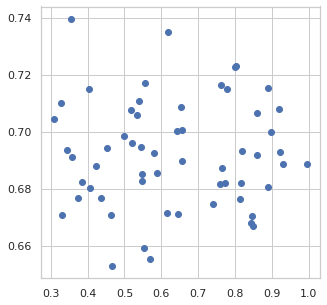

In [ ]:
a = ['param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_n_estimators', 'param_subsample'] 
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_colsample_bytree, results.mean_test_score)

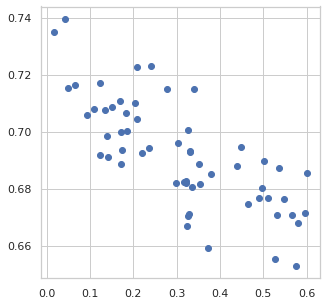

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_learning_rate, results.mean_test_score)

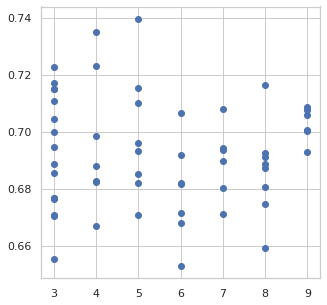

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_max_depth, results.mean_test_score)

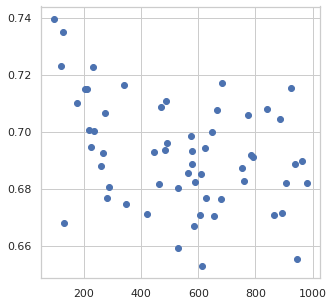

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_n_estimators, results.mean_test_score)

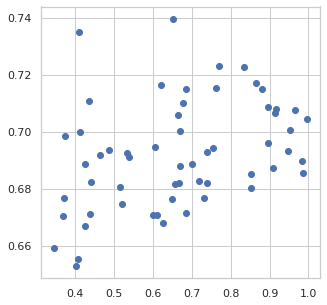

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_subsample, results.mean_test_score)

In [ ]:
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)

In [ ]:
estimator.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.611452231634857,
 'gamma': 0,
 'learning_rate': 0.08087027606454467,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 111,
 'nthread': 1,
 'objective': 'reg:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.9403659096234247,
 'verbosity': 1}

In [ ]:
df = pd.DataFrame()
df['id'] = id
df['target'] = preds
df.to_csv('11. submit.csv', index=False)

### Using a XGBoost Model we get a 0.69996 ~ 0.70977 score in Kaggle. 

  - **Submit 10th was with this hiper-params**

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.5831828945697735, 'gamma': 0, 'learning_rate': 0.04360665892108603, 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 1, 'missing': None, **'n_estimators': 172**, 'n_jobs': 1, 'nthread': None, **'objective': 'binary:logistic'**, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.8628600141530596, 'verbosity': 1}

  - **Submit 11th was with this hiper-params:**

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.611452231634857,
 'gamma': 0,
 'learning_rate': 0.08087027606454467,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 **'n_estimators': 111**,
 'nthread': 1,
 **'objective': 'reg:logistic'**,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.9403659096234247,
 'verbosity': 1}



In [ ]:
from sklearn.model_selection import GridSearchCV
import random

In [ ]:
# GridSearch

from sklearn.model_selection import GridSearchCV

#Objective function
objective = ['reg:logistic', 'binary:logistic']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]

# Col sample by tree
import random

# Col Sample by Tree
randomFloatList = []
for i in range(0, 3):
    x = random.uniform(0.3, 0.4)
    randomFloatList.append(x)
colsample_bytree = randomFloatList

# Maximum number of levels in tree
max_depth = [4,5]

#Learning rate
randomFloatList = []
for i in range(0, 3):
    x = random.uniform(0.01, 0.03)
    randomFloatList.append(x)
learning_rate = randomFloatList

# Subsample
randomFloatList = []
for i in range(0, 3):
    x = random.uniform(0.625, 0.675)
    randomFloatList.append(x)
subsample = randomFloatList

combinations = len(n_estimators)*len(colsample_bytree)*len(max_depth)*len(learning_rate)*len(subsample)*len(objective)

# Create the random grid
grid = {       'objective': objective, 
               'n_estimators': n_estimators,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'subsample': subsample
       }

from pprint import pprint
pprint(grid)
print("With this grid ww have ",combinations,"combinations")

{'colsample_bytree': [0.33225980128531757,
                      0.3605259865241926,
                      0.3039014549836771],
 'learning_rate': [0.0237552696479629,
                   0.014351600658577449,
                   0.022418271126407565],
 'max_depth': [4, 5],
 'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200],
 'objective': ['reg:logistic', 'binary:logistic'],
 'subsample': [0.632650292161672, 0.6606620541094052, 0.6470129716282141]}
With this grid ww have  1080 combinations


In [ ]:
# Using GridSearchCV to search for best hyperparameters
# First create the base model to tune
xgb_clf = xgb.XGBClassifier()

xgb_clf_search = GridSearchCV(estimator = xgb_clf, param_grid = grid, cv = 5, n_jobs = -1,
                              scoring='roc_auc', verbose=2)

# Fitting the grid search model
xgb_clf_search.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 68.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
                         'learning_rate': [0.0237552696479629,
                                           0.014351600658577449,
                                           0.022418271126407565],
                         'max_depth': [4, 5],
                         'n_estimators': [100, 111, 122, 133, 144, 155, 166,


In [ ]:
xgb_clf_search.cv_results_

{'mean_fit_time': array([0.92258868, 0.89811888, 0.90525875, ..., 2.05025096, 2.02602534,
        2.03116674]),
 'mean_score_time': array([0.01493931, 0.01414151, 0.0136837 , ..., 0.02431154, 0.02454123,
        0.02314577]),
 'mean_test_score': array([0.73667585, 0.73645112, 0.73641979, ..., 0.74011399, 0.74071962,
        0.74089491]),
 'param_colsample_bytree': masked_array(data=[0.33225980128531757, 0.33225980128531757,
                    0.33225980128531757, ..., 0.3039014549836771,
                    0.3039014549836771, 0.3039014549836771],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.0237552696479629, 0.0237552696479629,
                    0.0237552696479629, ..., 0.022418271126407565,
                    0.022418271126407565, 0.022418271126407565],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype

In [ ]:
best = xgb_clf_search.best_estimator_

cvs = cross_val_score(best, X_train, y_train, cv=10)
results = pd.DataFrame(xgb_clf_search.cv_results_)

In [ ]:
cvs.mean()

0.6960397188375468

In [ ]:
proba = best.predict_proba(X_test)
proba

array([[0.798267  , 0.20173301],
       [0.49608034, 0.50391966],
       [0.7521008 , 0.24789916],
       ...,
       [0.50056607, 0.49943393],
       [0.44330597, 0.55669403],
       [0.65862346, 0.3413765 ]], dtype=float32)

In [ ]:
best.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.3039014549836771,
 'gamma': 0,
 'learning_rate': 0.0237552696479629,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'nthread': 1,
 'objective': 'reg:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.6470129716282141,
 'verbosity': 1}

In [ ]:
preds = best.predict(X_test)

In [ ]:
df = pd.DataFrame()
df['id'] = id
df['target'] = preds
df.to_csv('12. submit.csv', index=False)